In [50]:
import modules
from modules.preprocessing import read_zip
from modules.DateInfo import DateInfo

In [51]:
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reload(modules.preprocessing)
from modules.preprocessing import read_zip, df_json_convert, timestamp_to_str, show_json_example
reload(modules.DateInfo)
from modules.DateInfo import DateInfo

In [3]:
PATH_TO_DATA = 'data/all.zip'

In [4]:
pd.set_option('max_columns', 100)

In [5]:
train = read_zip(PATH_TO_DATA, 'train.csv')

/home/kirill/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [6]:
train.head(2)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147


In [8]:
for col in ['device', 'geoNetwork', 'totals', 'trafficSource']:
    print(col)
    show_json_example(train[col][1], 'not available in demo dataset')
    print('-'*10)

device
browser: Firefox
operatingSystem: Macintosh
isMobile: False
deviceCategory: desktop
----------
geoNetwork
continent: Oceania
subContinent: Australasia
country: Australia
networkDomain: dodo.net.au
----------
totals
visits: 1
hits: 1
pageviews: 1
bounces: 1
newVisits: 1
----------
trafficSource
campaign: (not set)
source: google
medium: organic
keyword: (not provided)
adwordsClickInfo: {'criteriaParameters': 'not available in demo dataset'}
----------


In [10]:
train.groupby('sessionId').size()[train.groupby('sessionId').size()>1].head(1)

sessionId
0011338928267756760_1471848731    2
dtype: int64

In [11]:
train[train.sessionId=='0011338928267756760_1471848731'].sort_values('date')

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
212026,Organic Search,20160821,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",11338928267756760,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",0011338928267756760_1471848731,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1471848731,1,1471848731
82177,Organic Search,20160822,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",11338928267756760,"{""continent"": ""Asia"", ""subContinent"": ""Eastern...",0011338928267756760_1471848731,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1471848731,1,1471849330


In [54]:
DateInfo(train.visitStartTime).convert_dict

{1472830385: datetime.datetime(2016, 9, 2, 15, 33, 5),
 1472880147: datetime.datetime(2016, 9, 3, 5, 22, 27),
 1472865386: datetime.datetime(2016, 9, 3, 1, 16, 26),
 1472881213: datetime.datetime(2016, 9, 3, 5, 40, 13),
 1472822600: datetime.datetime(2016, 9, 2, 13, 23, 20),
 1472807194: datetime.datetime(2016, 9, 2, 9, 6, 34),
 1472817241: datetime.datetime(2016, 9, 2, 11, 54, 1),
 1472812602: datetime.datetime(2016, 9, 2, 10, 36, 42),
 1472805784: datetime.datetime(2016, 9, 2, 8, 43, 4),
 1472812272: datetime.datetime(2016, 9, 2, 10, 31, 12),
 1472834967: datetime.datetime(2016, 9, 2, 16, 49, 27),
 1472849434: datetime.datetime(2016, 9, 2, 20, 50, 34),
 1472839882: datetime.datetime(2016, 9, 2, 18, 11, 22),
 1472803483: datetime.datetime(2016, 9, 2, 8, 4, 43),
 1472868337: datetime.datetime(2016, 9, 3, 2, 5, 37),
 1472824614: datetime.datetime(2016, 9, 2, 13, 56, 54),
 1472801099: datetime.datetime(2016, 9, 2, 7, 24, 59),
 1472826820: datetime.datetime(2016, 9, 2, 14, 33, 40),
 14728

In [39]:
datetime.strptime('2016-09-02', '%Y-%M-%d')

2016

In [26]:
timestamp_to_str(train.visitStartTime)

0        2016-09-02 15:33:05
1        2016-09-03 05:22:27
2        2016-09-03 01:16:26
3        2016-09-03 05:40:13
4        2016-09-02 13:23:20
5        2016-09-02 09:06:34
6        2016-09-02 11:54:01
7        2016-09-02 10:36:42
8        2016-09-02 08:43:04
9        2016-09-02 10:31:12
10       2016-09-02 16:49:27
11       2016-09-02 20:50:34
12       2016-09-02 18:11:22
13       2016-09-02 08:04:43
14       2016-09-03 02:05:37
15       2016-09-02 13:56:54
16       2016-09-02 07:24:59
17       2016-09-02 14:33:40
18       2016-09-02 08:23:27
19       2016-09-02 22:54:34
20       2016-09-02 14:27:00
21       2016-09-03 00:49:14
22       2016-09-03 03:15:30
23       2016-09-02 09:28:04
24       2016-09-02 08:56:33
25       2016-09-02 11:34:08
26       2016-09-02 09:20:02
27       2016-09-03 06:47:35
28       2016-09-02 14:59:00
29       2016-09-02 18:01:01
                 ...        
903623   2017-01-04 10:23:49
903624   2017-01-04 23:43:26
903625   2017-01-05 01:42:28
903626   2017-

In [31]:
print(datetime.utcfromtimestamp(1471848731).strftime('%Y-%m-%d %H:%M:%S'))

2016-08-22 06:52:11


In [35]:
print(datetime.utcfromtimestamp(1471849330).strftime('%Y-%m-%d %H:%M:%S'))

2016-08-22 07:02:10


In [45]:
print(datetime.utcfromtimestamp(1471849330))

2016-08-22 07:02:10


In [ ]:
timestamp_to_str()

In [6]:
train = df_json_convert(train, ['device', 'geoNetwork', 'totals', 'trafficSource'])

In [7]:
train.head(2)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google


In [8]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')

In [9]:
gdf = train.groupby('fullVisitorId')["totals.transactionRevenue"].sum().reset_index()

In [10]:
gdf.head()

,fullVisitorId,totals.transactionRevenue
0,5103959234087,0.0
1,10278554503158,0.0
2,20424342248747,0.0
3,27376579751715,0.0
4,33471059618621,0.0


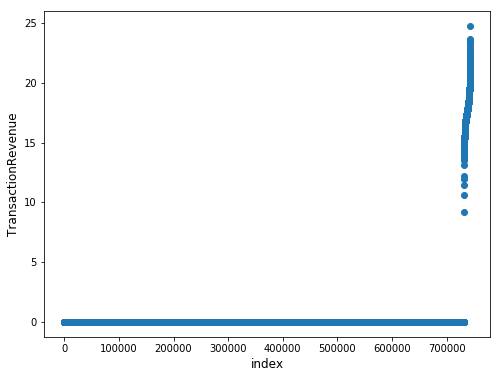

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

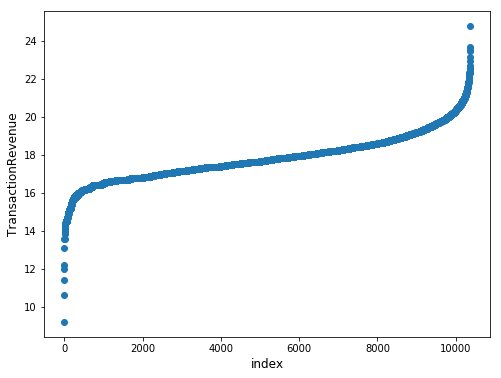

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(range(gdf[gdf["totals.transactionRevenue"]>0].shape[0]),
            np.sort(np.log1p(gdf[gdf["totals.transactionRevenue"]>0]["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

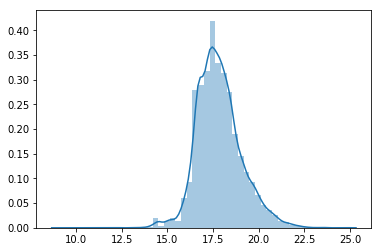

In [13]:
sns.distplot(np.log1p(gdf[gdf["totals.transactionRevenue"]>0]["totals.transactionRevenue"].values))

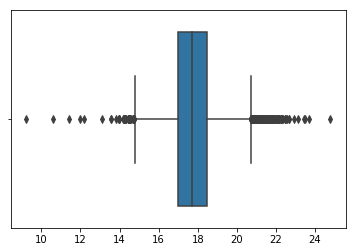

In [14]:
sns.boxplot(np.log1p(gdf[gdf["totals.transactionRevenue"]>0]["totals.transactionRevenue"].values))

In [15]:
drop_cols = [c for c in train.columns if train[c].nunique(dropna=False)==1]
drop_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [16]:
train.drop(drop_cols, axis=1, inplace=True)

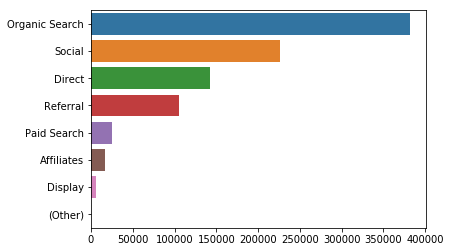

In [17]:
sns.barplot(y=train.channelGrouping.value_counts().index, x=train.channelGrouping.value_counts().values)
plt.show()

___